In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Define Time Period and Parameters

In [2]:
START_DATE = dt.datetime(1970,1,1)
END_DATE = dt.datetime(2020,12,31)
T = 252

# Define Asset Allocation

In [3]:
fixed_asset_allocation = {'Four Seasons': {'assets': ['VTI', 'TLT', 'IEF', 'GLD', 'DBC'],
                                         'weights': np.array([0.3, 0.4, 0.15, 0.075, 0.075])},
                          'All Weather': {'assets': ['VT', 'LTPZ', 'EDV', 'VCLT', 'EMLC', 'IAU', 'BCI'],
                                         'weights': [0.35, 0.2, 0.2, 0.075, 0.075, 0.05, 0.05]},
                         'Sixty Forty': {'assets': ['VTI', 'BND'],
                                        'weights': np.array([0.6, 0.4])},
                         'Permanent': {'assets': ['VTI', 'IEF', 'TLT', 'GLD'],
                                      'weights': np.array([0.25, 0.25, 0.25, 0.25])},
                         'SPY (Benchmark)': {'assets': ['SPY'],
                                      'weights': np.array([1])},
                         'Custom Portfolio': {'assets': ['SPY', 'VT', 'TLT', 'GLD'],
                                             'weights': np.array([0.25, 0.25, 0.25, 0.25])}}

# Get Price Data

In [4]:
combined = []

for portfolio in fixed_asset_allocation.keys():
    combined = combined + fixed_asset_allocation[portfolio]['assets']

combined_assets = list(set(combined))
combined_assets

['SPY',
 'VT',
 'VTI',
 'VCLT',
 'BCI',
 'TLT',
 'IEF',
 'LTPZ',
 'GLD',
 'EDV',
 'BND',
 'IAU',
 'DBC',
 'EMLC']

In [5]:
prices = pd.DataFrame()
for asset in combined_assets:
    prices[asset] = web.DataReader(asset, 'yahoo', START_DATE, END_DATE)['Adj Close']
prices.dropna(inplace=True)

In [6]:
prices

,SPY,VT,VTI,VCLT,BCI,TLT,IEF,LTPZ,GLD,EDV,BND,IAU,DBC,EMLC
Date,,,,,,,,,,,,,,
2017-03-31,218.867828,59.669853,112.808067,76.826561,23.018423,110.532585,98.334679,60.580570,118.720001,96.444420,72.577995,12.010000,14.778238,29.416630
2017-04-03,218.487167,59.614960,112.529121,77.363403,23.018423,111.647484,98.818718,60.964760,119.349998,97.763313,72.841736,12.070000,14.719940,29.400656
2017-04-04,218.626434,59.651543,112.584915,77.071838,22.966002,111.041878,98.678833,60.726929,119.620003,97.103859,72.761009,12.090000,14.865684,29.464508
2017-04-05,217.976532,59.422832,112.129272,77.251900,23.078196,111.381371,98.865349,61.074501,119.620003,97.433601,72.823799,12.100000,14.894831,29.448534
2017-04-06,218.589294,59.514320,112.482620,77.234756,23.137974,111.216209,98.800064,60.973896,119.180000,97.147263,72.850700,12.050000,14.933696,29.416616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,367.795380,91.351700,192.179596,110.251282,21.639999,156.919067,119.648849,88.059998,176.350006,152.080002,87.738182,17.920000,14.600000,32.841721
2020-12-28,370.955048,91.770607,193.395523,110.181633,21.370001,156.988892,119.658829,88.139999,175.710007,152.039993,87.708275,17.870001,14.510000,32.851604
2020-12-29,370.247345,91.950142,192.588226,110.251282,21.480000,156.789383,119.638855,88.000000,176.350006,151.759995,87.738182,17.910000,14.550000,32.890312


# Portfolio Performance Analysis

In [7]:
#portfolios = ['All Weather', 'Sixty Forty', 'Permanent', 'SPY (Benchmark)']

stats_summary = pd.DataFrame(columns = ['Portfolio', 'CAGR (%)', 'MDD (%)', 'CAGR / MDD'])
combined_cumulatives = pd.DataFrame()
for portfolio in fixed_asset_allocation.keys():
    
    port_data = pd.DataFrame()
    
    # get corresponding price data
    for column in prices.columns:
        if column in fixed_asset_allocation[portfolio]['assets']:
            port_data[column] = prices[column]
    
    # compute daily returns of individual assets
    daily_returns = port_data.pct_change()
    
    # compute daily returns of the portfolio    
    daily_returns[portfolio] = daily_returns.dot(fixed_asset_allocation[portfolio]['weights'])
    
    # compute cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()
    cumulative_returns.fillna(1, inplace=True)
    
    # save cumulative returns of the portfolio for comparison
    
    if portfolio == 'All Weather':
        allWeather = cumulative_returns
    
    if portfolio == 'Sixty Forty':
        sixtyForty = cumulative_returns
    
    if portfolio == 'Permanent':
        permanent = cumulative_returns
    
    combined_cumulatives[portfolio] = cumulative_returns[portfolio]
    
    
    # compute CAGR
    cagr = cumulative_returns**(T/len(cumulative_returns.index)) - 1
    portfolio_cagr = cagr.loc[cagr.index[-1], portfolio]

    # compute MDD
    cumulative_returns = cumulative_returns[portfolio]
    previous_peaks = cumulative_returns.cummax()
    drawdown = (cumulative_returns - previous_peaks) / previous_peaks
    #drawdown.plot()
    portfolio_mdd = drawdown.min()
    
    # save CAGR and MDD for each portfolio
    
    stats_summary = stats_summary.append({'Portfolio': portfolio,
                                         'CAGR (%)': portfolio_cagr * 100,
                                         'MDD (%)': portfolio_mdd* 100,
                                         'CAGR / MDD': abs(portfolio_cagr / portfolio_mdd).round(2)}, ignore_index=True)   

Text(0.5, 1.0, 'Portfolio Performance Comparison')

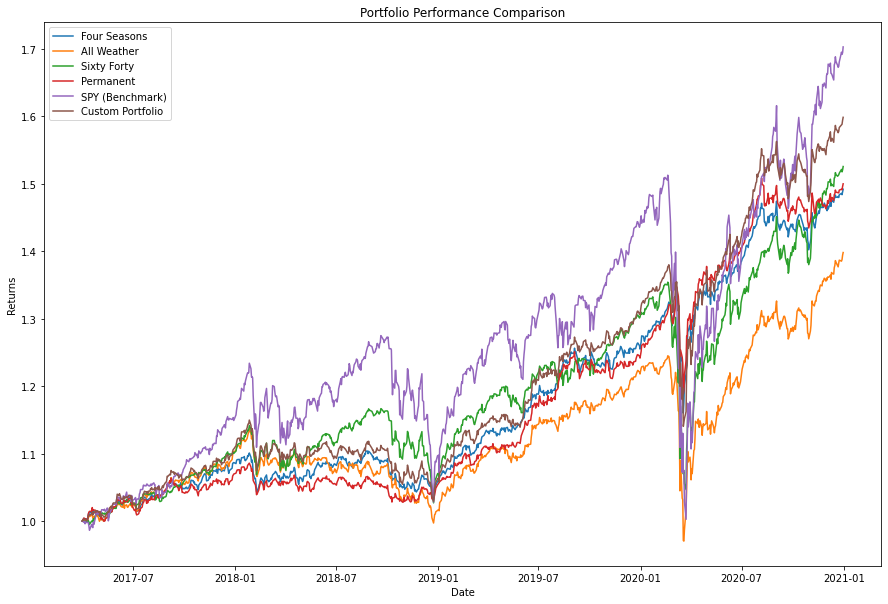

In [8]:
plt.figure(figsize=(15,10))
plt.plot(combined_cumulatives)
plt.legend(combined_cumulatives.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Performance Comparison')

In [9]:
stats_summary.set_index('Portfolio', inplace=True)
stats_summary.sort_values('CAGR / MDD', ascending=False)

,CAGR (%),MDD (%),CAGR / MDD
Portfolio,,,
Permanent,11.401078,-11.766576,0.97
Four Seasons,11.243032,-13.827376,0.81
Custom Portfolio,13.305902,-17.358384,0.77
Sixty Forty,11.905128,-22.697855,0.52
SPY (Benchmark),15.231064,-33.717255,0.45
All Weather,9.334409,-22.057351,0.42


Text(0.5, 1.0, 'All Weather Portfolio')

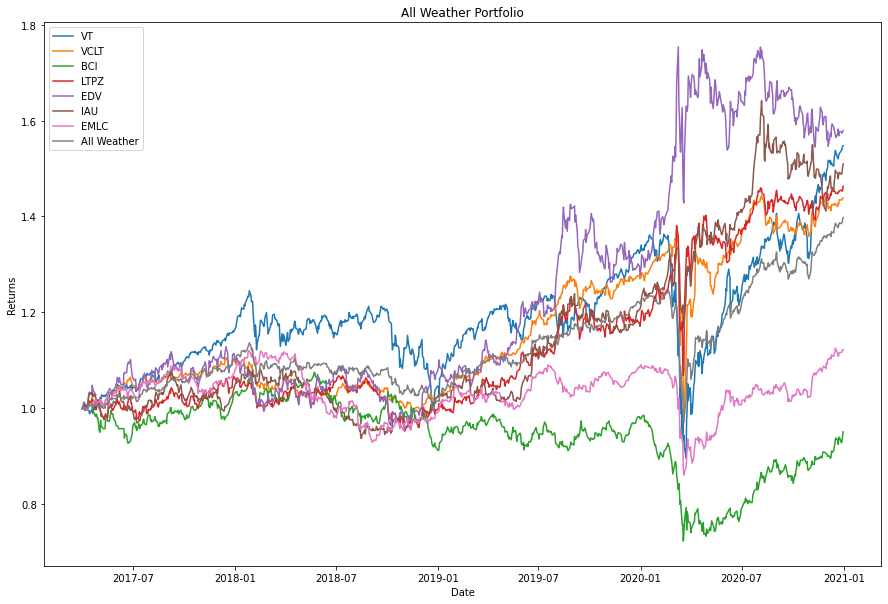

In [10]:

plt.figure(figsize=(15,10))
plt.plot(allWeather)
plt.legend(allWeather.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('All Weather Portfolio')


Text(0.5, 1.0, 'Permanent Portfolio')

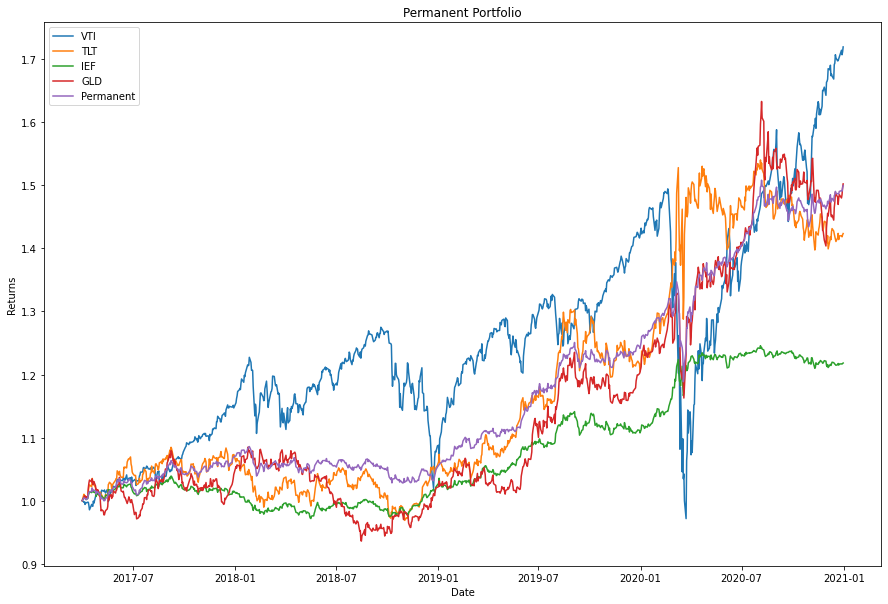

In [11]:
plt.figure(figsize=(15,10))
plt.plot(permanent)
plt.legend(permanent.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Permanent Portfolio')

Text(0.5, 1.0, '60% Equity 40% Bond Portfolio')

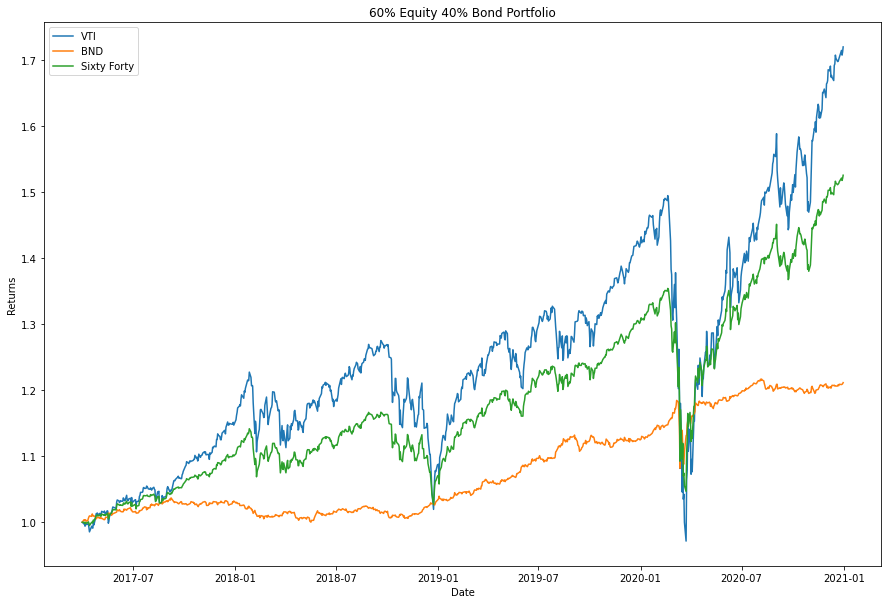

In [12]:
plt.figure(figsize=(15,10))
plt.plot(sixtyForty)
plt.legend(sixtyForty.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('60% Equity 40% Bond Portfolio')